In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Loading Data

In [96]:
static_folder = 'train-log_static-GCA-NN-MSE-GA'

circle_data_static = []
star_data_static = []
ring_data_static = []

for i in range(5):
    circle_data_static.append(np.load(f'{static_folder}/training_circle_{i}/scores.npy', allow_pickle=True)[:,0])
    star_data_static.append(np.load(f'{static_folder}/training_star_{i}/scores.npy', allow_pickle=True)[:,0])
    ring_data_static.append(np.load(f'{static_folder}/training_ring_{i}/scores.npy', allow_pickle=True)[:,0])


In [97]:
growing_folder = 'train-log_growing-GCA-NN-MSE-GA'

circle_data_growing= []
star_data_growing = []
ring_data_growing = []

for i in range(5):
    circle_data_growing.append(np.load(f'{growing_folder}/training_circle_{i}/scores.npy', allow_pickle=True))
    star_data_growing.append(np.load(f'{growing_folder}/training_star_{i}/scores.npy', allow_pickle=True))
    ring_data_growing.append(np.load(f'{growing_folder}/training_ring_{i}/scores.npy', allow_pickle=True))

In [98]:
big_data_dico = {
    'circle': {
        'static': circle_data_static,
        'growing': circle_data_growing
    },
    'star': {
        'static': star_data_static,
        'growing': star_data_growing
    },
    'ring': {
        'static': ring_data_static,
        'growing': ring_data_growing
    }
}

# Plotting best scores of all runs with median and IQR

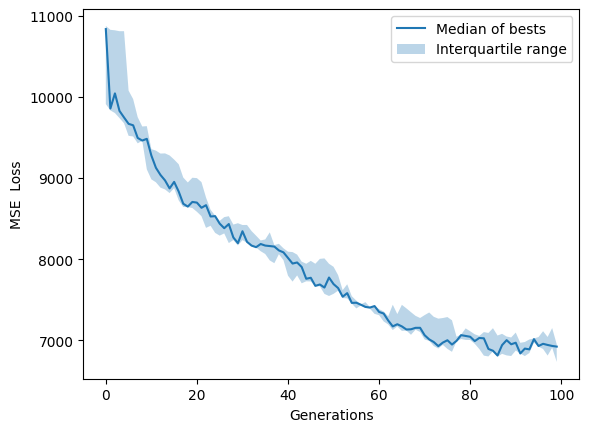

In [117]:
# CHOOSE YOUR TARGET (circle, star, ring) and SETUP (static, growing)
target_name = 'ring'
setup = 'static'


# PLOT
nb_generations = min([len(data_array[i]) for i in range(5)])
data_array = big_data_dico[target_name][setup]
data_array = np.array([data_array[i][:nb_generations] for i in range(5)])   # for possible inequal length of data
generations = np.arange(0, nb_generations, 1)
median = np.median(data_array, axis=0)
q1 = np.quantile(data_array, 0.25, axis = 0)
q3 = np.quantile(data_array, 0.75, axis = 0)
plt.plot(median, label = 'Median of bests')
plt.fill_between(generations, q1, q3, alpha = 0.3, label = 'Interquartile range')
plt.xlabel('Generations')
plt.ylabel('MSE  Loss')
plt.legend()
plt.show()